# Extract Tourists Arrivals from Eurostat
This notebook extracts the total number of tourists arrivals from the [European Statistics: Annual Data on Tourism Industries](https://ec.europa.eu/eurostat/web/tourism/data/database) for some selected countries.
As a result, the notebook saves data into a CSV file.

In [132]:
import pandas as pd
import matplotlib.pyplot as plt


def extract_data(country):
    df = pd.read_csv('data/eurostat.csv')
    df = df[df['geo'] == country]
    df = df[df['unit'] == 'NR']
    df = df[df['c_resid'] == 'TOTAL']
    df.drop(['c_resid', 'unit', 'nace_r2', '2019M11', 'geo'],axis=1, inplace=True)
    df = df.reset_index()
    df.drop(['index'],axis=1, inplace=True)
            
    y = []
    #columns = df.columns[::-1]
    for column in df.columns:
        for row in range(len(df[column])-1, -1,-1):
            
            if "b" in df[column][row]:
                df[column] = df[column][row][:-2]
            if ":" in df[column][row]:
                df[column][row] = "0"
            if " " in df[column][row]:
                df[column][row] = df[column][row][:-1]
            
                
    for column in df.columns:
        df[column] = df[column].astype(str).astype(int)
        y.insert(0,df[column].sum())
        
    for i in range(len(dates)-1,-1,-1 ):    
        X[len(dates)-1-i] = df.columns[i].replace("M", "-") + '-01'
        
    
    series = pd.Series(y, index=X)
    plt.plot(series)
    plt.ylabel(country + ' Total Number of Tourists Arrivals')
    plt.grid()
    plt.show()
    return series

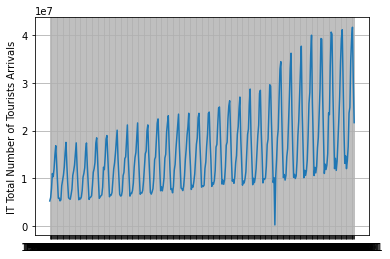

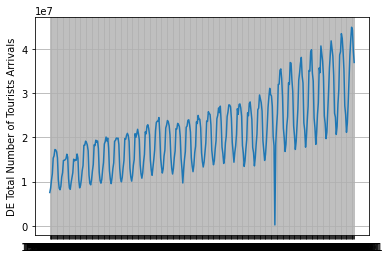

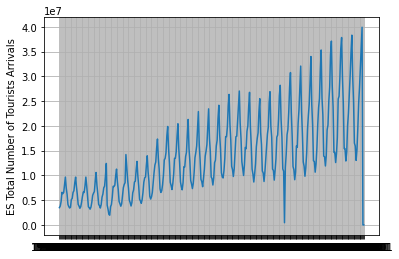

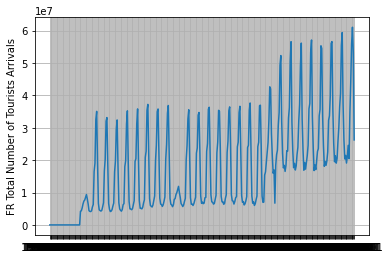

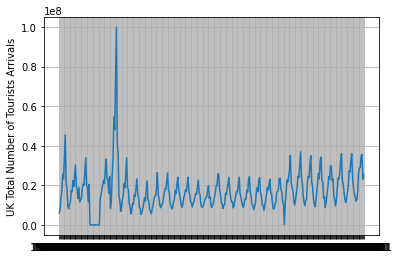

In [133]:
series_it = extract_data('IT')
series_de = extract_data('DE')
series_es = extract_data('ES')
series_fr = extract_data('FR')
series_uk = extract_data('UK')

In [137]:
tot = pd.concat([series_it, series_de,series_es,series_fr,series_uk], join='outer', axis=1)
tot.rename(columns={0: 'IT', 1: 'DE', 2:'ES', 3: 'FR', 4: 'UK'},inplace=True)
tot.rename_axis(axis=1, columns='date',inplace=True)
tot.to_csv('data/EU_tourists_arrivals.csv')